In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('./../Docs/DATA/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


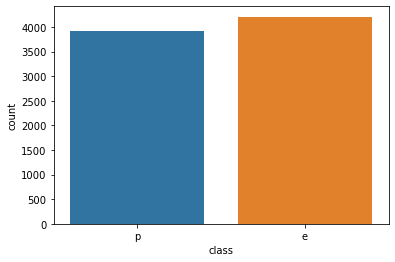

In [7]:
sns.countplot(
    data=df,
    x='class'
);

In [14]:
feat_uni=df.describe().transpose().reset_index().sort_values('unique')

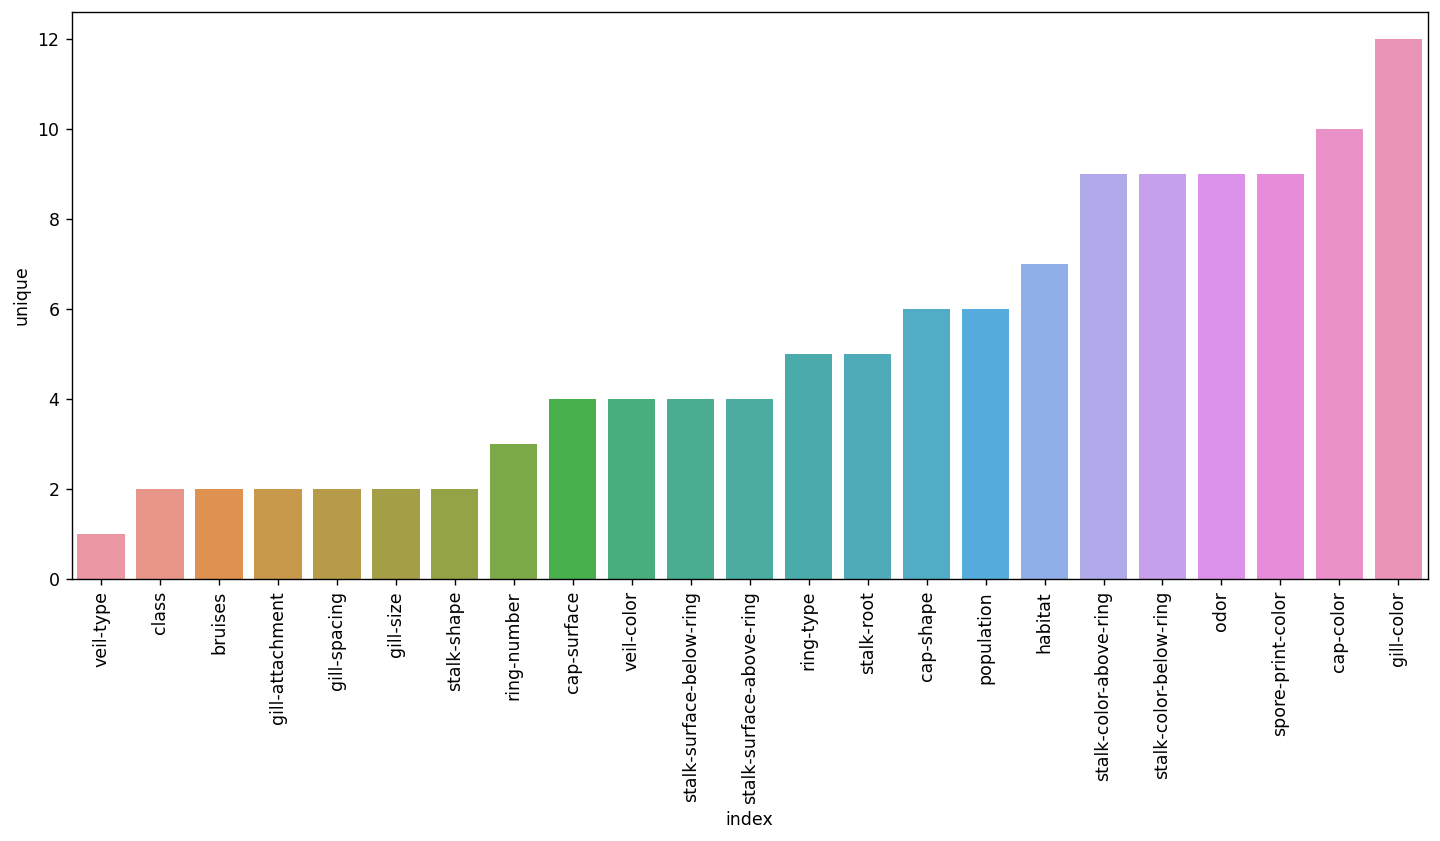

In [18]:
plt.figure(
    figsize=(14, 6),
    dpi=125
)

sns.barplot(
    data=feat_uni,
    x='index',
    y='unique'
);

plt.xticks(
    rotation=90
);

In [23]:
X=df.drop('class', axis=1)

X=pd.get_dummies(X, drop_first=True)

In [24]:
y=df['class']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [27]:
from sklearn.ensemble import AdaBoostClassifier

In [28]:
model=AdaBoostClassifier(
    n_estimators=1
)

In [29]:
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [30]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [32]:
preds=model.predict(X_test)
preds

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [33]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [34]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [39]:
# It will provide the index of best feature or index of max value in above list.
model.feature_importances_.argmax()

22

In [40]:
# Its is the most important feature
X.columns[22]

'odor_n'

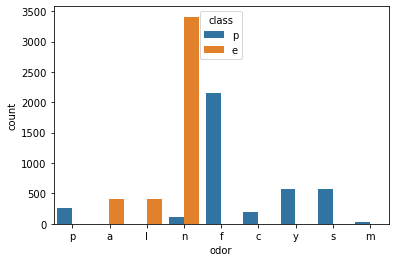

In [44]:
sns.countplot(
    data=df,
    x='odor',
    hue='class'
);

In [45]:
len(X.columns)

95

In [48]:
error_rates=[]

for n in range(1, 96):
    model=AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    preds=model.predict(X_test)
    
    err=1-accuracy_score(y_test, preds)
    error_rates.append(err)

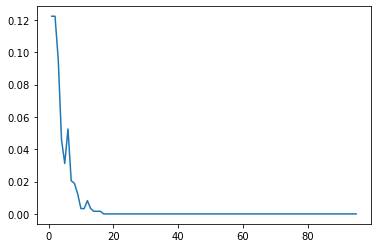

In [49]:
plt.plot(range(1, 96), error_rates)